<a href="https://colab.research.google.com/github/ChaitnyaAvasare/The-Spark-Foundation/blob/main/ChaitanyaTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Shop Sales Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [ ]:
file='/content/SampleSuperstore.csv'
sales_data=pd.read_csv(file)
sales_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
print('This data has {} rows and {} columns'.format(sales_data.shape[0], sales_data.shape[1]))

This data has 9994 rows and 13 columns


### The Super Store dataset doesn’t need any data processing as it is already in a clean form, the dataset is ready for the analysis.

In [ ]:
sales_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Exploratory Data Analysis

### The Super Store has 3 categories of products

In [ ]:
sales_data.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### And 17 sub-categories

In [ ]:
sales_data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)


## Let’s now examine the sales and profit by the 3 categories.


In [ ]:
sales_by_category=sales_data.groupby('Category').sum().reset_index()
sales_by_category['Sales%']=(sales_by_category.Sales/sales_by_category.Sales.sum())*100
sales_by_category['Profit%']=(sales_by_category.Profit/sales_by_category.Profit.sum())*100
display(sales_by_category)

print(' ')
print('Total sales % by Technology is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][2],sales_by_category['Profit%'][2]))
print('Total sales % by Furniture is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][0],sales_by_category['Profit%'][0]))
print('Total sales % by Office Supplies is {:.2F}% and profit % is {:.2F}% '.format(sales_by_category['Sales%'][1],sales_by_category['Profit%'][1]))

,Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728,32.300171,6.442551
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008,31.301008,42.769579
2,Technology,102603754,836154.0330,6939,244.40,145454.9481,36.398821,50.787870


 
Total sales % by Technology is 36.40% and profit % is 50.79% 
Total sales % by Furniture is 32.30% and profit % is 6.44% 
Total sales % by Office Supplies is 31.30% and profit % is 42.77% 


## Let's visualize the data

Text(0.5, 1.0, 'Profit by Category')

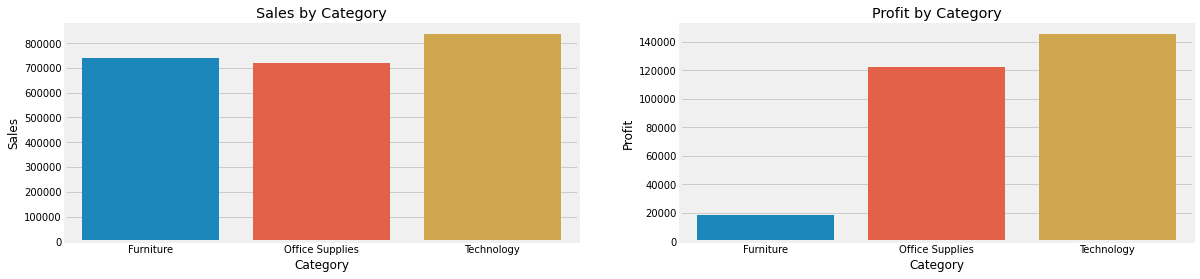

In [ ]:
fig=plt.figure(figsize=(18,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(sales_by_category.Category,sales_by_category.Sales,ax=ax1)
ax1.set_title("Sales by Category")
sns.barplot(sales_by_category.Category,sales_by_category.Profit,ax=ax2)
ax2.set_title("Profit by Category")

As we can see the Technology category has the highest sales and profit having total sales of \$836k  and profit of \$145K.
The Furniture category has a total sales of \$741K and profit of \$18K
The Office Supplies category has a total sales of \$719K and profit of \$122K


## Let’s now examine the sales and profit by the sub-categories.

In [ ]:
sales_by_subcategory=sales_data.groupby('Sub-Category').sum().sort_values(ascending=False,by='Sales').reset_index()
sales_by_subcategory['Sales%']=(sales_by_subcategory.Sales/sales_by_category.Sales.sum())*100
sales_by_subcategory['Profit%']=(sales_by_subcategory.Profit/sales_by_category.Profit.sum())*100
sales_by_subcategory

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Phones,47897175,330007.0540,3289,137.40,44515.7306,14.365616,15.543364
1,Chairs,34936229,328449.1030,2356,105.00,26590.1663,14.297796,9.284372
2,Storage,46248720,223843.6080,3158,63.20,21278.8264,9.744190,7.429835
3,Tables,18607828,206965.5320,1241,83.35,-17725.4811,9.009466,-6.189129
4,Binders,83626398,203412.7330,5974,567.00,30221.7633,8.854808,10.552401
5,Machines,6364668,189238.6310,440,35.20,3384.7569,8.237792,1.181841
6,Accessories,44468434,167380.3180,2976,60.80,41936.6357,7.286273,14.642832
7,Copiers,3873477,149528.0300,234,11.00,55617.8249,6.509140,19.419834
8,Bookcases,12771539,114879.9963,868,48.14,-3472.5560,5.000869,-1.212497
9,Appliances,25250538,107532.1610,1729,77.60,18138.0054,4.681008,6.333168


## Let's visualize the data.

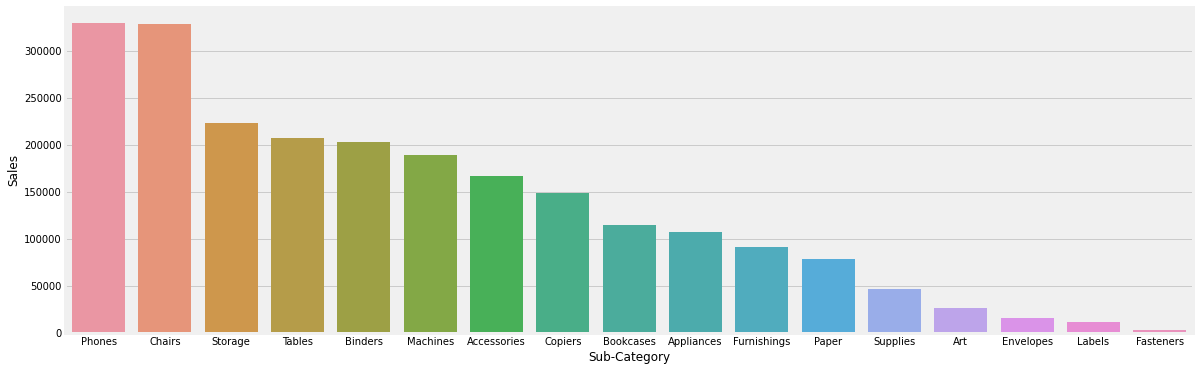

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(x = "Sub-Category", y = "Sales", data=sales_by_subcategory)

As we can see the sub-categories Phones and Chairs holds the top spots for the most sales, the Phones sub-category has a total sales of $330K and the Chairs sub-category has \$328K.

## Let’s now look into profits by sub-categories.

In [ ]:
profit_by_subcategory=sales_by_subcategory.sort_values(ascending=False,by='Profit').reset_index(drop=True)
profit_by_subcategory

,Sub-Category,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Copiers,3873477,149528.0300,234,11.00,55617.8249,6.509140,19.419834
1,Phones,47897175,330007.0540,3289,137.40,44515.7306,14.365616,15.543364
2,Accessories,44468434,167380.3180,2976,60.80,41936.6357,7.286273,14.642832
3,Paper,76299221,78479.2060,5178,102.60,34053.5693,3.416297,11.890336
4,Binders,83626398,203412.7330,5974,567.00,30221.7633,8.854808,10.552401
5,Chairs,34936229,328449.1030,2356,105.00,26590.1663,14.297796,9.284372
6,Storage,46248720,223843.6080,3158,63.20,21278.8264,9.744190,7.429835
7,Appliances,25250538,107532.1610,1729,77.60,18138.0054,4.681008,6.333168
8,Furnishings,51880430,91705.1640,3563,132.40,13059.1436,3.992039,4.559804
9,Envelopes,13325731,16476.4020,906,20.40,6964.1767,0.717238,2.431651


## Let's visualize the data

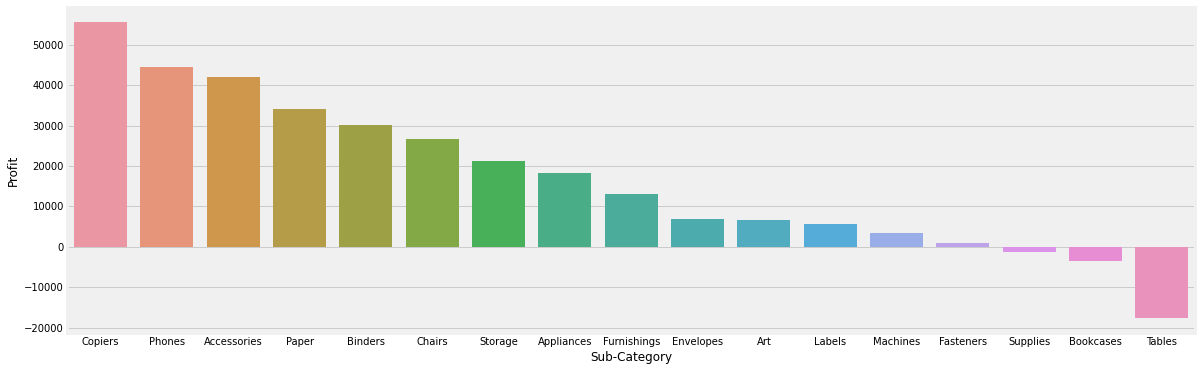

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(x = "Sub-Category", y = "Profit", data=profit_by_subcategory)


OK, Now we have the total sales and profit by different categories of products and their sub-categories, let’s now inspect the sales and profit by different Segments.


## We have 3 types of Segments: Consumer, Corporate and Home Office.

In [ ]:
sales_by_segment=sales_data.groupby('Segment').sum().reset_index()
sales_by_segment['Sales%']=(sales_by_segment.Sales/sales_by_category.Sales.sum())*100
sales_by_segment['Profit%']=(sales_by_segment.Profit/sales_by_category.Profit.sum())*100
sales_by_segment

,Segment,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092,50.557240,46.829820
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340,30.739426,32.115953
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785,18.703334,21.054227


## Let's visualize the data

Text(0.5, 1.0, 'Profit by segment')

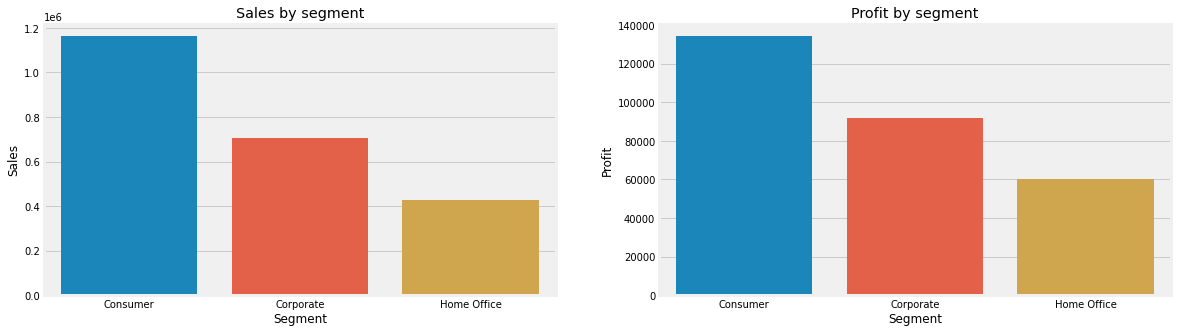

In [ ]:
fig=plt.figure(figsize=(18,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(sales_by_segment.Segment,sales_by_segment.Sales,ax=ax1)
ax1.set_title("Sales by segment")
sns.barplot(sales_by_segment.Segment,sales_by_segment.Profit,ax=ax2)
ax2.set_title("Profit by segment")

As you can see the Consumer segment has the most amount of Sales and Profit followed by Corporate and then Home Office.

## Let’s now look at the sales and profit by Ship Mode:

In [ ]:
shipmode=sales_data.groupby('Ship Mode').sum().reset_index()
shipmode['Sales%']=(shipmode.Sales/sales_by_category.Sales.sum())*100
shipmode['Profit%']=(shipmode.Profit/sales_by_category.Profit.sum())*100
shipmode

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Sales%,Profit%
0,First Class,84229511,3.514284e+05,5693,253.17,48969.8399,15.298115,17.098586
1,Same Day,31242093,1.283631e+05,1960,82.75,15891.7589,5.587806,5.548856
2,Second Class,108192588,4.591936e+05,7423,270.15,57446.6354,19.989265,20.058391
3,Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875,59.124814,57.294167


## Let's now visualize the data

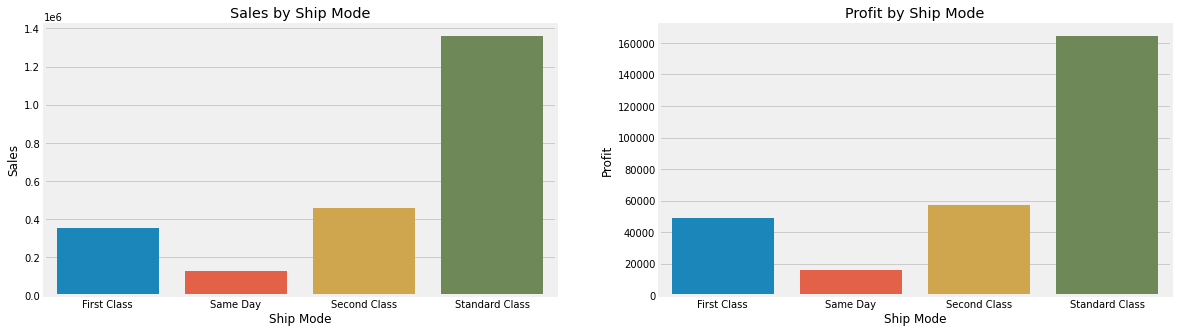

In [ ]:
fig=plt.figure(figsize=(18,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(shipmode['Ship Mode'],shipmode.Sales,ax=ax1)
ax1.set_title("Sales by Ship Mode")
sns.barplot(shipmode['Ship Mode'],shipmode.Profit,ax=ax2)
ax2.set_title("Profit by Ship Mode")

sns.barplot(shipmode['Ship Mode'],shipmode.Profit)

Looking at the graph we can say that, sales and profit generated by the different shipping modes are identical. 

OK, This ends our Exploratory Data Analysis phase.

## Key Findings and Insights

Looking at the analysis we can say that the Furniture category has a striking low profit margin as compared to the other two categories, even though the Furniture category has more sales than Office Supplies category it’s profit margin is way too low that of Office Supplies. Further analysis on the sub-categories shows us that the Tables and Bookcases have negative profit sales which are under the Furniture category.

We will further investigate to try to determine the root cause for declining profit margin of the Furniture category, predominately focusing on its sub-category Tables and Bookcases.


## Hypothesis Testing
The Tables sub-category is at rank no 4 in total sales generated by sub-categories yet it has the lowest profit and same with the Bookcases, it has moderate sales but negative profit sales.
To estimate the cause of the declining profit of the Tables and Bookcases, we will be assuming the following hypothesis:

Null hypothesis (Ho) : The cause of declining profit of Tables and Bookcases has nothing to do with                   	the types of Ship modes or types of Segments or the City where it is shipped.

Alternative hypothesis(H1) : The declining profit of Tables and Bookcases has some impact from the type of 
         Ship modes or types of Segments or the City where it is shipped.


Let’s now look for some evidence to reject the null hypothesis (Ho) in the favour of the alternative hypothesis (H1) that there is an impact on the declining profit of Tables and Bookcases due to the above mentioned reasons.

## First we will seperate the Furniture Category.

In [ ]:
Furnitures=sales_data.loc[sales_data['Category']=="Furniture",:].reset_index(drop=True)
Furnitures.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


### As we are only interested in data related to Tables and Bookcases, filter the data only with Tables and Bookcases.

In [ ]:
tables_bookcases=Furnitures[(Furnitures['Sub-Category'] == 'Tables') | (Furnitures['Sub-Category'] == 'Bookcases')].reset_index(drop=True)
tables_bookcases.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
2,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
3,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.6300,3,0.00,240.2649
4,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
5,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
6,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Furniture,Tables,787.5300,3,0.00,165.3813
7,Standard Class,Consumer,United States,Bloomington,Illinois,61701,Central,Furniture,Tables,617.7000,6,0.50,-407.6820
8,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,899.1360,4,0.20,112.3920
9,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,626.3520,3,0.20,46.9764


## Lets count the number of sales by both sub-categories.

In [ ]:
tables_bookcases['Sub-Category'].value_counts()

Tables       319
Bookcases    228
Name: Sub-Category, dtype: int64

### Now we will only work with the units which have negative profit sales. 

In [ ]:
Negative_profits=tables_bookcases.loc[tables_bookcases.Profit <= 0].reset_index(drop=True)
Negative_profits.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
2,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
3,Standard Class,Consumer,United States,Bloomington,Illinois,61701,Central,Furniture,Tables,617.7000,6,0.50,-407.6820
4,First Class,Consumer,United States,Denver,Colorado,80219,West,Furniture,Tables,218.7500,2,0.50,-161.8750
5,Standard Class,Corporate,United States,Medina,Ohio,44256,East,Furniture,Bookcases,452.4500,5,0.50,-244.3230
6,Standard Class,Home Office,United States,Tampa,Florida,33614,South,Furniture,Tables,233.8600,2,0.45,-102.0480
7,Standard Class,Home Office,United States,Tampa,Florida,33614,South,Furniture,Tables,620.6145,3,0.45,-248.2458
8,Second Class,Consumer,United States,Chicago,Illinois,60610,Central,Furniture,Tables,177.2250,5,0.50,-120.5130
9,Second Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Bookcases,86.9700,3,0.50,-48.7032


### Let's counts of sales which are negative.

In [ ]:
Negative_profits["Sub-Category"].value_counts()

Tables       205
Bookcases    111
Name: Sub-Category, dtype: int64

The Tables have a total sales of 319 units out of which 205 units have negative profit.

The Bookcases have a total sales of 228 units out of which 111 units have negative profit.


## Let’s check the top cities with most negative profit sales.

In [ ]:
by_city=Negative_profits.groupby('City').sum().sort_values(by='Profit').reset_index()
by_city.head(10)

,City,Postal Code,Sales,Quantity,Discount,Profit
0,Philadelphia,440077,12583.5310,100,10.00,-5156.8951
1,New York City,360723,18027.4540,118,11.80,-3936.7482
2,Aurora,462551,2727.0440,30,3.70,-1969.2214
3,Concord,28027,4297.6440,13,0.40,-1862.3124
4,Phoenix,425115,2712.8190,22,2.70,-1848.8919
5,Chicago,848790,4405.1650,52,5.80,-1757.9257
6,Houston,1618074,12588.7554,87,6.54,-1745.4529
7,Springfield,578391,2038.1000,22,3.80,-1488.3651
8,Jacksonville,157404,3139.0670,24,1.95,-1352.4994
9,Colorado Springs,242718,1024.5840,16,1.90,-1178.7004


## Let's visualize the top 5 cities.

Text(0.5, 1.0, 'Top 5 Cities with most negative profit')

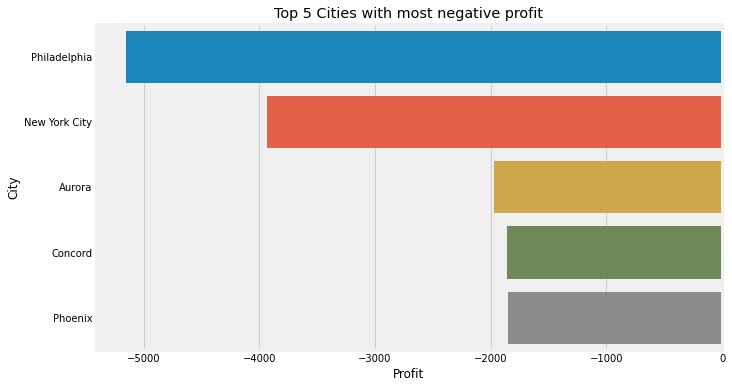

In [ ]:
plt.subplots(figsize=(10,6))
sns.barplot(y=by_city.head().City,x=by_city.head().Profit)
plt.title("Top 5 Cities with most negative profit")

As you can see, Philadelphia and New York City has the most negative profit sales.

Philadelphia having a total negative profit sales of  -$5,156.89.

New York City having a total negative profit sales of  -\$3,936.74.


## Let’s now check the total negative profit sales by different segments.

In [ ]:
by_segment=Negative_profits.groupby('Segment').sum().sort_values(by='Profit').reset_index()
by_segment.head()

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,9691920,87702.4010,635,62.16,-24210.2274
1,Corporate,4953616,45441.0063,396,35.30,-13570.0967
2,Home Office,2175964,21351.8445,163,15.78,-6784.0302


## Let's visualize the data.

Text(0.5, 1.0, 'Negative Profit by Segment')

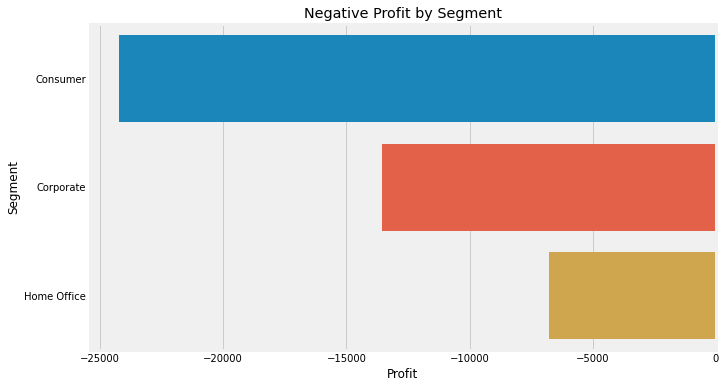

In [ ]:
plt.subplots(figsize=(10,6))
sns.barplot(y=by_segment.Segment,x=by_segment.Profit)
plt.title("Negative Profit by Segment")

As you can see, the Consumer segment have the greatest negative profit sales compared to the other two segments having a total negative profit sales of - $24,210.22

## Let’s now check the negative profit sales related to the Ship modes.

In [ ]:
by_ship=Negative_profits.groupby('Ship Mode').sum().sort_values(by='Profit').reset_index()
by_ship.head()

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit
0,Standard Class,10643987,98768.6645,721,68.72,-28025.6888
1,Second Class,2711494,27403.5609,204,20.45,-9038.1292
2,First Class,2734456,21611.7014,203,19.02,-6001.7610
3,Same Day,731563,6711.3250,66,5.05,-1498.7753


## Let's visualize the data

Text(0.5, 1.0, 'Negative Profit by Ship Mode')

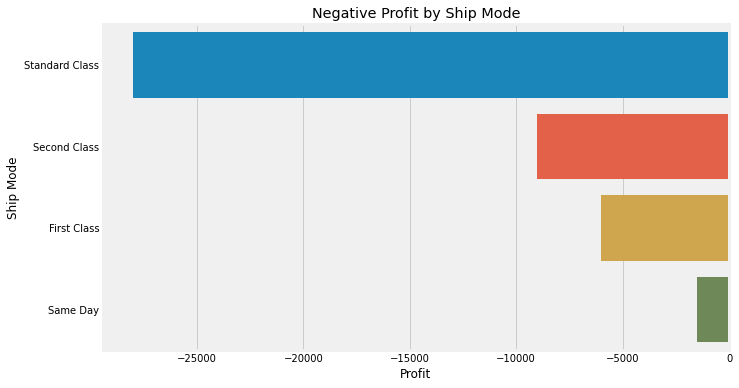

In [ ]:
plt.subplots(figsize=(10,6))
sns.barplot(y=by_ship['Ship Mode'],x=by_ship.Profit)
plt.title("Negative Profit by Ship Mode")

This graph clearly shows how the Standard Class ship mode is dominating in the generation of negative profit sales for the Super shop.

The Standard Class ship mode has a total negative profit of -$28,025.68.


As we can see that the Standard Class ship mode has a significant increase in negative profit sales compared to others, let’s now check the Cities contributing to the negative profit sales by the Standard Class shipping mode.

In [ ]:
Ship_cities=Negative_profits[Negative_profits['Ship Mode']=='Standard Class'].City.value_counts().reset_index().rename(columns={'index':'City','City':'Count'})
Ship_cities.head()

,City,Count
0,New York City,20
1,Philadelphia,15
2,San Francisco,12
3,Houston,12
4,Chicago,8


## Let's visualize the top 5 cities

Text(0.5, 1.0, 'Top Cities generating negative profits by Standard Ship Mode')

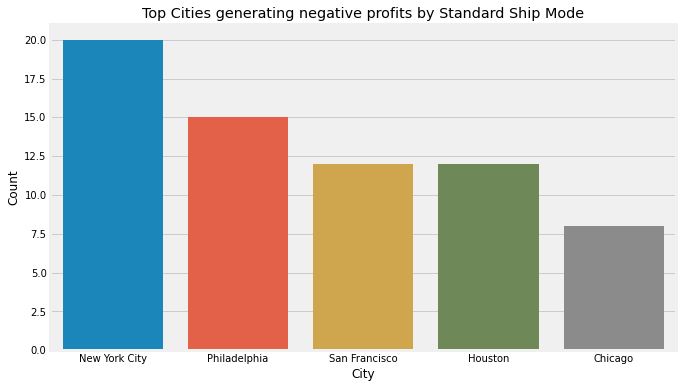

In [ ]:
plt.subplots(figsize=(10,6))
sns.barplot(x=Ship_cities.head().City,y=Ship_cities.head().Count)
plt.title("Top Cities generating negative profits by Standard Ship Mode")

New York City has the most negative profit sales by Standard ship mode followed by Philadelphia.

## Let’s now check the Cities contributing to the generation of negative profit sales by the Consumer Segment.

In [ ]:
Segment_city=Negative_profits[Negative_profits['Segment']=='Consumer'].City.value_counts().reset_index().rename(columns={'index':'City','City':'Count'})
Segment_city.head()

,City,Count
0,New York City,21
1,Houston,10
2,Chicago,10
3,Philadelphia,9
4,San Francisco,8


## Let's visualize the top cities

Text(0.5, 1.0, 'Top Cities generating negative profits by Consumer Segment')

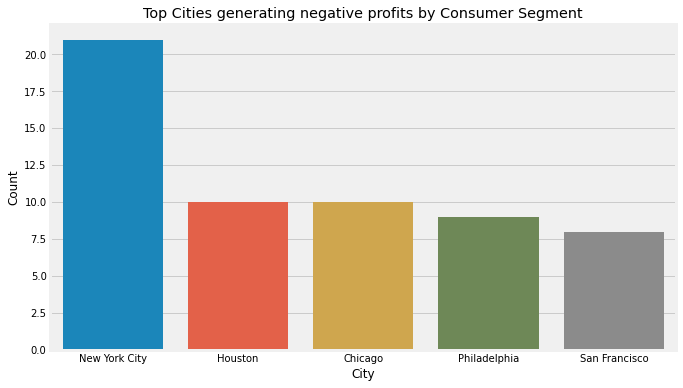

In [ ]:
plt.subplots(figsize=(10,6))
sns.barplot(x=Segment_city.head().City,y=Segment_city.head().Count)
plt.title("Top Cities generating negative profits by Consumer Segment")

Again the New York City has the most negative profit sales by Consumer Segment.
Now we have enough evidence to conclude our hypothesis testing.


## Result

Looking at the above results we can say that the types of Ship modes, types of Segments and the City where it is shipped has an impact on the declining profit margin for Tables and Bookcases.

Now we have enough evidence to reject the null hypothesis (Ho) and accept the alternative hypothesis (H1) claiming that the declining profit of Tables and Bookcases has some impact from the types of Ship modes or types of Segments or the City where it is shipped.

